In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv("Video_games.csv")

In [23]:
# Hiển thị mẫu dữ liệu
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,Nintendo,M
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,Nintendo,M


In [26]:
# các trường dữ liệu
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [142]:
# In thông tin về dữ liệu
df.info()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,1970-01-01 00:00:00.000002006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1970-01-01 00:00:00.000001985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.994363,26.441313,7.12633,163.015141,Nintendo,M
2,Mario Kart Wii,Wii,1970-01-01 00:00:00.000002008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,1970-01-01 00:00:00.000002009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.00000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1970-01-01 00:00:00.000001996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.994363,26.441313,7.12633,163.015141,Nintendo,M


In [24]:
# kiểu dữ liệu
df.dtypes

Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [153]:
#Hiển thị đặc điểm của dữ liệu
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16416,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000
mean,1970-01-01 00:00:00.000002006,0.264129,0.146034,0.078623,0.047670,0.536708,68.995703,26.441157,7.126589,163.012280
min,1970-01-01 00:00:00.000001980,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,1970-01-01 00:00:00.000002003,0.000000,0.000000,0.000000,0.000000,0.060000,68.994363,22.000000,7.126330,30.000000
50%,1970-01-01 00:00:00.000002007,0.080000,0.020000,0.000000,0.010000,0.170000,68.994363,26.441313,7.126330,163.015141
75%,1970-01-01 00:00:00.000002010,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,26.441313,7.300000,163.015141
max,1970-01-01 00:00:00.000002020,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000
std,NaN,0.819028,0.507134,0.311348,0.188156,1.559885,9.705292,13.254839,1.010456,380.168417


In [154]:
# hiển thị số lượng cột và hàng dữ liệu
df.shape

(16416, 16)

In [120]:
# Kiểm tra giá trị thiếu
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [7]:
#Xóa các dòng có giá trị trống hoặc kiểu chuỗi trong 4 cột 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'.
num_cols = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

for col in num_cols:
  df = df[df[col].astype(str) != '']
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
#Tính giá trị trung bình của mỗi cột
avg_scores = df[num_cols].mean()

In [9]:
#Điền giá trị trung bình vào các ô trống
for col in num_cols:
  df[col] = df[col].fillna(avg_scores[col])

In [10]:
# Xử lý giá trị thiếu
df = df.dropna()
# Kiểm tra lại giá trị thiếu
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [150]:
# Chuyển đổi cột ngày tháng
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'])

In [155]:
# Đếm số lần xuất hiện của mỗi nền tảng
platform_counts = df['Platform'].value_counts()

# Hiển thị kết quả
print(platform_counts)

Platform
PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      429
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


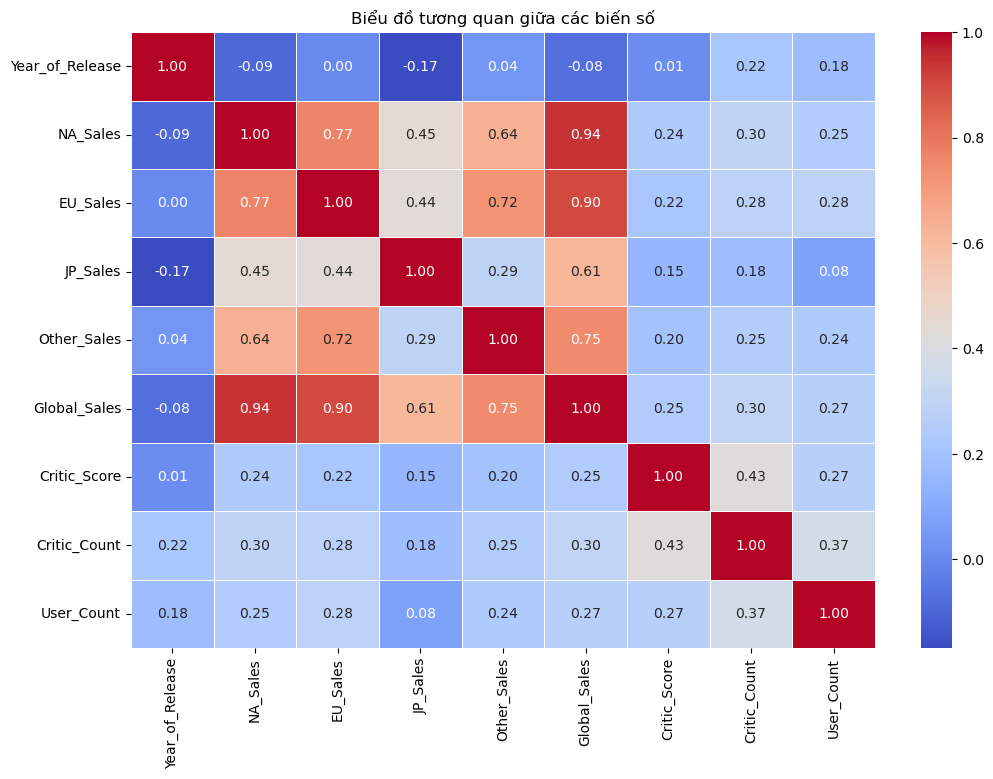

In [157]:
# Loại bỏ các cột không phải số
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Tạo ma trận tương quan
correlation_matrix = df_numeric.corr()

# Vẽ biểu đồ heatmap tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Biểu đồ tương quan giữa các biến số')
plt.show()

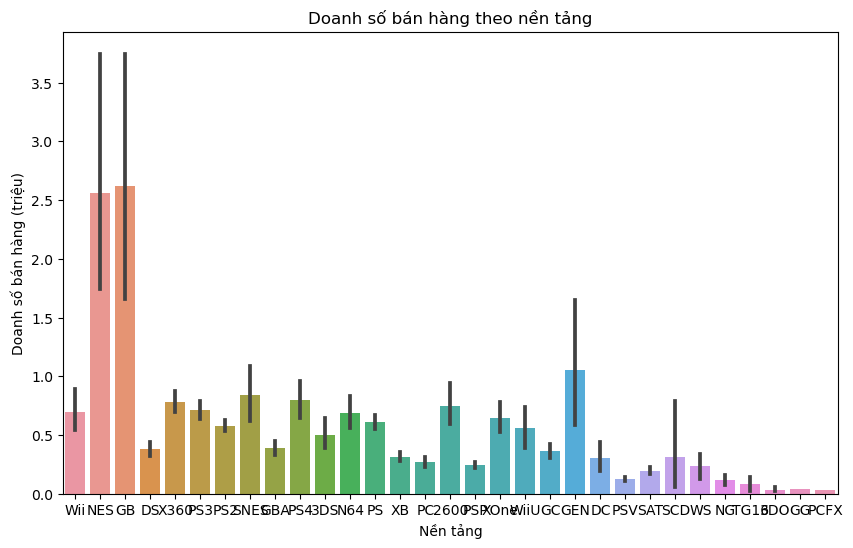

In [129]:
# Tính tổng doanh số bán hàng toàn cầu
total_global_sales = df['Global_Sales'].sum()

# Vẽ biểu đồ doanh số bán hàng theo nền tảng
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Global_Sales', data=df)
plt.title('Doanh số bán hàng theo nền tảng')
plt.xlabel('Nền tảng')
plt.ylabel('Doanh số bán hàng (triệu)')
plt.show()

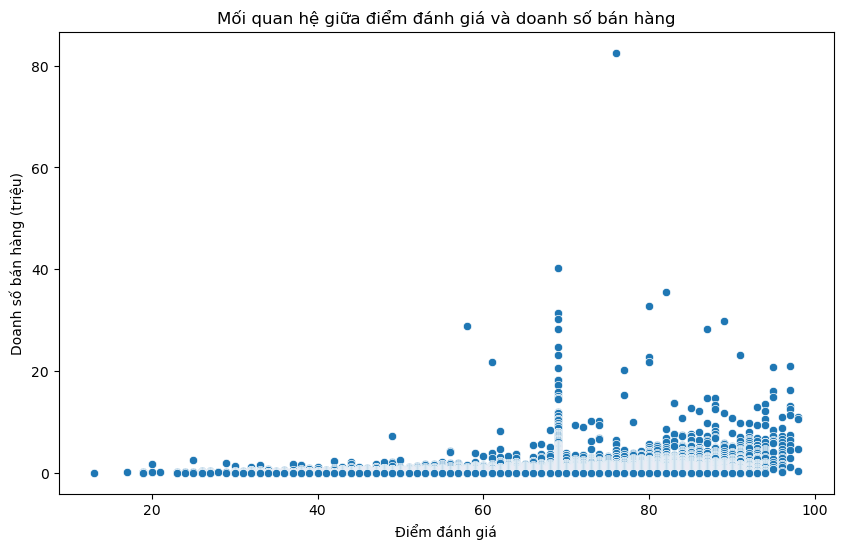

In [130]:
# Biểu đồ scatter plot giữa điểm đánh giá và doanh số bán hàng
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=df)
plt.title('Mối quan hệ giữa điểm đánh giá và doanh số bán hàng')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Doanh số bán hàng (triệu)')
plt.show()

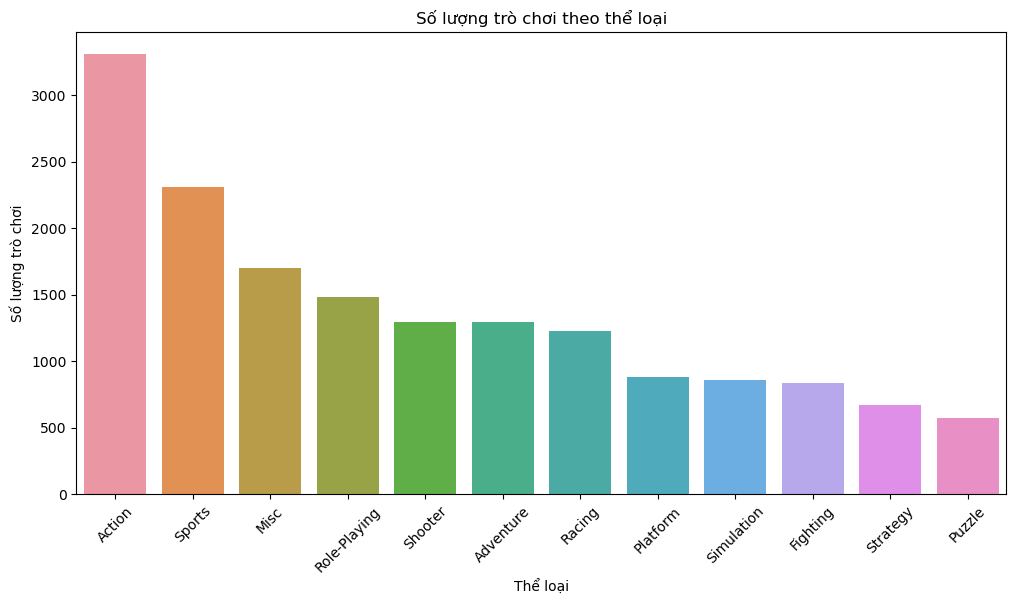

In [131]:
#Biểu đồ countplot Xác định thể loại trò chơi phổ biến nhất
popular_genre = df['Genre'].value_counts().index[0]

# Vẽ biểu đồ thể loại trò chơi
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Số lượng trò chơi theo thể loại')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng trò chơi')
plt.xticks(rotation=45)
plt.show()

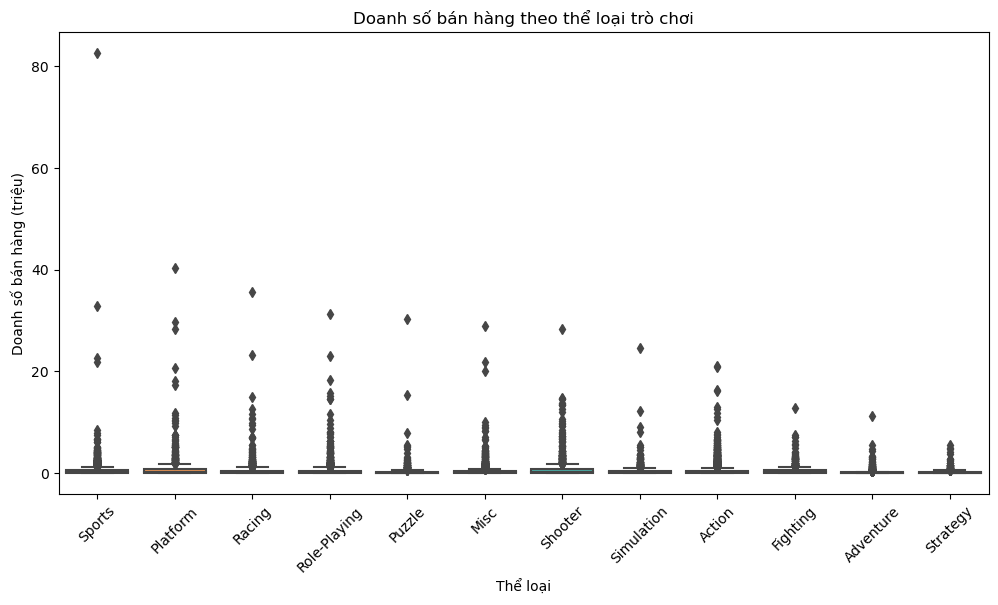

In [132]:
# Biểu đồ boxplot doanh số bán hàng theo thể loại
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.title('Doanh số bán hàng theo thể loại trò chơi')
plt.xlabel('Thể loại')
plt.ylabel('Doanh số bán hàng (triệu)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Rot\AppData\Local\Temp\ipykernel_2236\711291219.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['User_Score'], label='Người chơi', shade=True)
C:\Users\Rot\AppData\Local\Temp\ipykernel_2236\711291219.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Critic_Score'], label='Chuyên gia', shade=True)


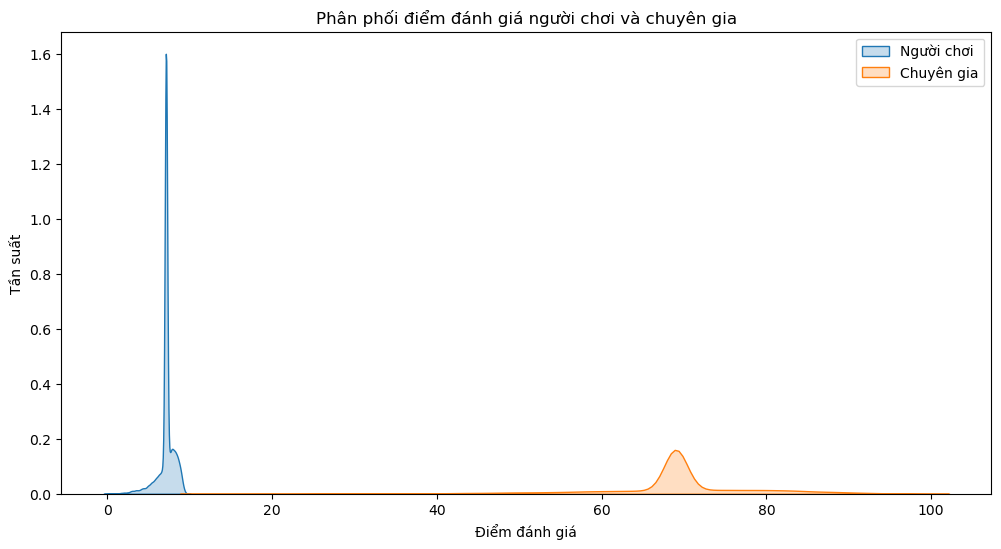

In [136]:
# Biểu đồ phân phối điểm đánh giá người chơi và chuyên gia
plt.figure(figsize=(12, 6))
sns.kdeplot(df['User_Score'], label='Người chơi', shade=True)
sns.kdeplot(df['Critic_Score'], label='Chuyên gia', shade=True)
plt.title('Phân phối điểm đánh giá người chơi và chuyên gia')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Tần suất')
plt.legend()
plt.show()

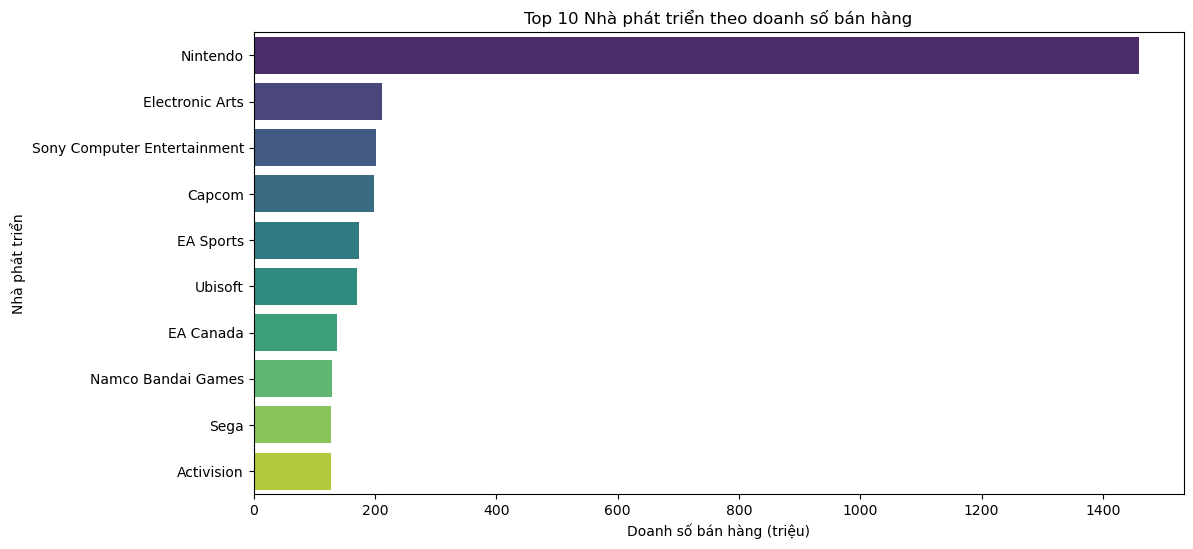

In [134]:
# Top nhà phát triển theo doanh số bán hàng
top_developers = df.groupby('Developer')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Biểu đồ bar chart doanh số bán hàng theo nhà phát triển
plt.figure(figsize=(12, 6))
sns.barplot(x=top_developers.values, y=top_developers.index, palette='viridis')
plt.title('Top 10 Nhà phát triển theo doanh số bán hàng')
plt.xlabel('Doanh số bán hàng (triệu)')
plt.ylabel('Nhà phát triển')
plt.show()

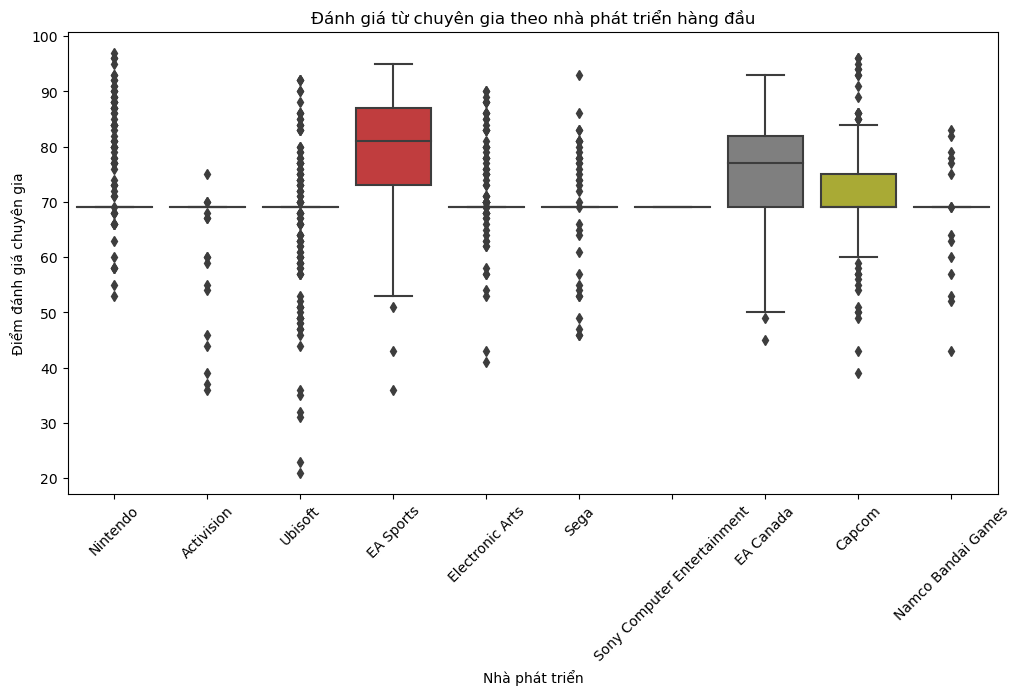

In [135]:
# Biểu đồ boxplot điểm đánh giá theo nhà phát triển
plt.figure(figsize=(12, 6))
sns.boxplot(x='Developer', y='Critic_Score', data=df[df['Developer'].isin(top_developers.index)])
plt.title('Đánh giá từ chuyên gia theo nhà phát triển hàng đầu')
plt.xlabel('Nhà phát triển')
plt.ylabel('Điểm đánh giá chuyên gia')
plt.xticks(rotation=45)
plt.show()

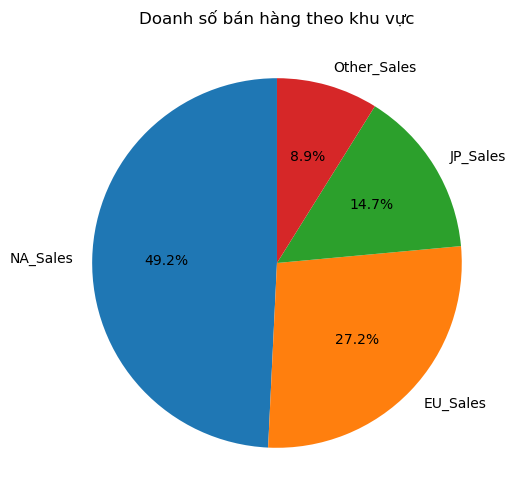

In [137]:
# Tính tổng doanh số bán hàng theo khu vực
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Biểu đồ pie chart doanh số bán hàng theo khu vực
plt.figure(figsize=(10, 6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Doanh số bán hàng theo khu vực')
plt.show()

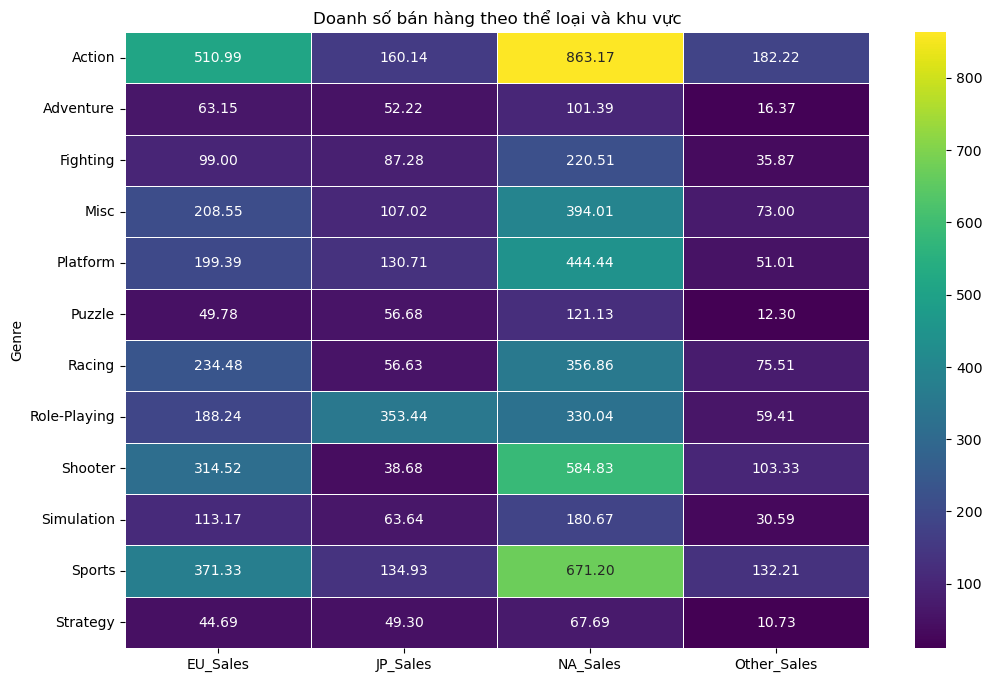

In [138]:
# Tạo bảng pivot cho thể loại và khu vực
genre_region_sales = df.pivot_table(index='Genre', values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], aggfunc='sum')

# Vẽ biểu đồ heatmap thị trường thể loại trò chơi ở mỗi khu vực
plt.figure(figsize=(12, 8))
sns.heatmap(genre_region_sales, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)
plt.title('Doanh số bán hàng theo thể loại và khu vực')
plt.show()

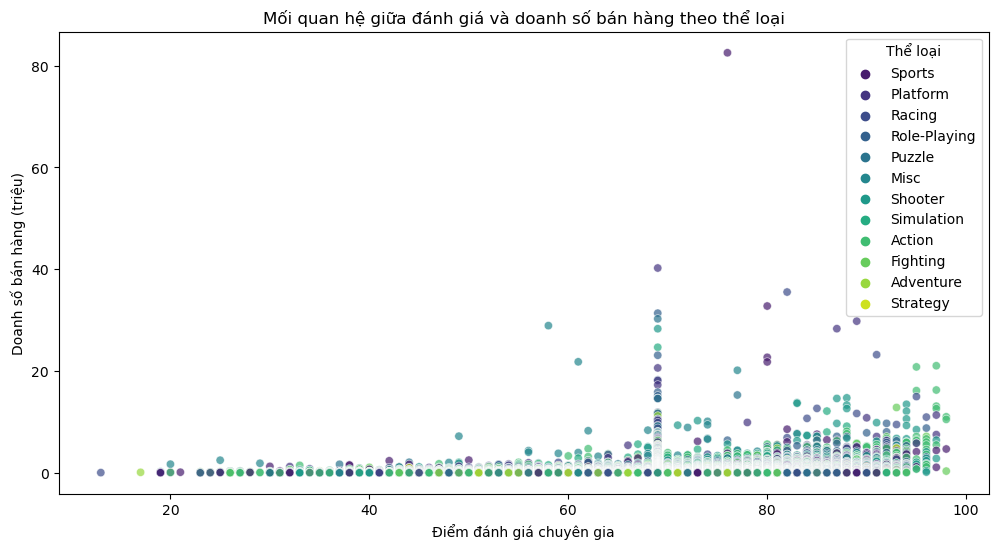

In [139]:
# Biểu đồ scatter plot giữa điểm đánh giá chuyên gia và doanh số bán hàng theo thể loại
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Critic_Score', y='Global_Sales', hue='Genre', data=df, palette='viridis', alpha=0.7)
plt.title('Mối quan hệ giữa đánh giá và doanh số bán hàng theo thể loại')
plt.xlabel('Điểm đánh giá chuyên gia')
plt.ylabel('Doanh số bán hàng (triệu)')
plt.legend(title='Thể loại')
plt.show()

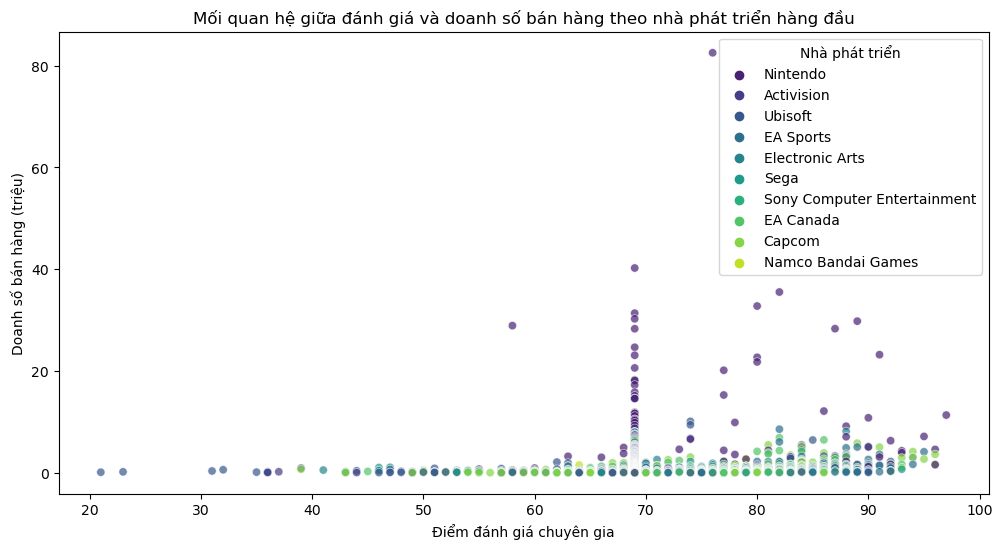

In [140]:
# Biểu đồ scatter plot giữa điểm đánh giá chuyên gia và doanh số bán hàng theo nhà phát triển
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Critic_Score', y='Global_Sales', hue='Developer', data=df[df['Developer'].isin(top_developers.index)], palette='viridis', alpha=0.7)
plt.title('Mối quan hệ giữa đánh giá và doanh số bán hàng theo nhà phát triển hàng đầu')
plt.xlabel('Điểm đánh giá chuyên gia')
plt.ylabel('Doanh số bán hàng (triệu)')
plt.legend(title='Nhà phát triển')
plt.show()

Mean Squared Error của mô hình: 4.137300706770432


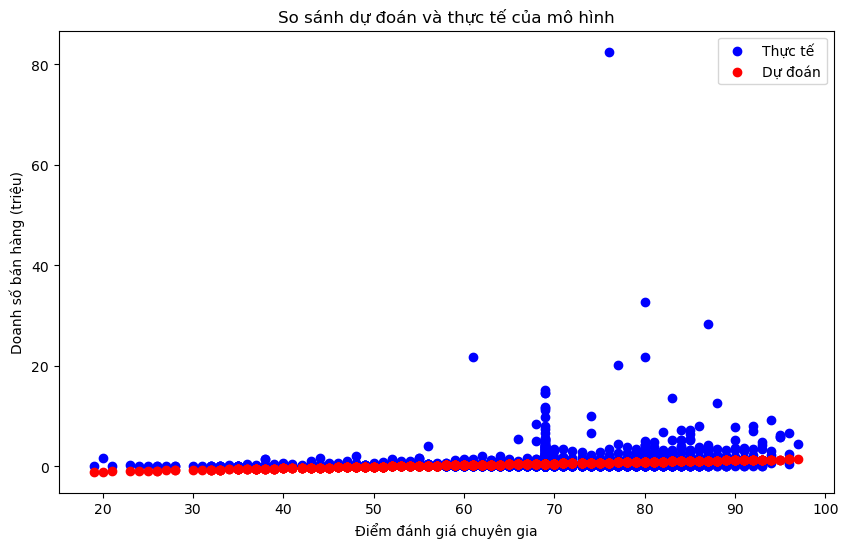

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Lọc dữ liệu cho mô hình hóa
model_data = df[['Critic_Score', 'Global_Sales']].dropna()

# Tạo dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(model_data[['Critic_Score']], model_data['Global_Sales'], test_size=0.2, random_state=42)

# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán doanh số bán hàng trên tập test
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error của mô hình: {mse}')

# Biểu đồ so sánh dự đoán và thực tế
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Thực tế')
plt.scatter(X_test, y_pred, color='red', label='Dự đoán')
plt.title('So sánh dự đoán và thực tế của mô hình')
plt.xlabel('Điểm đánh giá chuyên gia')
plt.ylabel('Doanh số bán hàng (triệu)')
plt.legend()
plt.show()

In [27]:
#Sử dụng mô hình Linear Regression để dự đoán doanh số bán hàng toàn cầu (Global_Sales)

# Lọc dữ liệu cho mô hình hóa
model_data = df[['Critic_Score', 'User_Score', 'User_Count', 'Global_Sales']].dropna()

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = model_data[['Critic_Score', 'User_Score', 'User_Count']]
y = model_data['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán doanh số bán hàng trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error của mô hình Linear Regression: {mse}')

Mean Squared Error của mô hình Linear Regression: 2.217000743694212


In [28]:
#Sử dụng mô hình Cây nhị phân để dự đoán doanh số bán hàng toàn cầu (Global_Sales)

# Tạo và huấn luyện mô hình Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Dự đoán doanh số bán hàng trên tập kiểm tra
y_pred_dt = dt_model.predict(X_test)

# Đánh giá mô hình
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Mean Squared Error của Decision Tree Regressor: {mse_dt}')

Mean Squared Error của Decision Tree Regressor: 4.005011099025058


In [20]:
#Sử dụng mô hình Random Forest Regressor để dự đoán doanh số bán hàng toàn cầu (Global_Sales)

# Tạo và huấn luyện mô hình Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Dự đoán doanh số bán hàng trên tập kiểm tra
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error của Random Forest Regressor: {mse_rf}')

Mean Squared Error của Random Forest Regressor: 0.06926229793371026
